### Implementación Básica
- Maximizar función f(x) = x**2

In [2]:
import random

In [3]:
# función objetivo
def fitness_function(x):
    return x**2

# generar población inicial
def generate_population(size, gene_length):
    return [random.randint(0, 2**gene_length - 1) for _ in range(size)]

# selección por ruleta
def select_parents(population, fitnesses):
    total_fitness = sum(fitnesses)
    probabilities = [f / total_fitness for f in fitnesses]
    return random.choices(population, probabilities, k=2)

# cruce de un punto
def crossover(parent1, parent2, gene_length):
    point = random.randint(1, gene_length - 1)
    mask = (1 << point) - 1
    child1 = (parent1 & mask) | (parent2 & ~mask)
    child2 = (parent2 & mask) | (parent1 & ~mask)
    return child1, child2

# mutación
def mutate(individual, gene_length, mutation_rate=0.01):
    for i in range(gene_length):
        if random.random() < mutation_rate:
            individual ^= (1 << i) # flip bit
    return individual

In [64]:
# algoritmo
def genetic_algorithm(pop_size, gene_length, generations, mutation_rate):
    population = generate_population(pop_size, gene_length)
    for gen in range(generations):
        fitnesses = [fitness_function(ind) for ind in population]
        new_population = []
        for _ in range(pop_size // 2):
            parent1, parent2 = select_parents(population, fitnesses)
            child1, child2 = crossover(parent1, parent2, gene_length)
            new_population.extend([
                mutate(child1, gene_length, mutation_rate),
                mutate(child2, gene_length, mutation_rate)
            ])
        population = new_population
        best_individual = max(population, key=fitness_function)
        print(f"Generation {gen + 1}: Best fitness = {fitness_function(best_individual)}")
    return best_individual

In [68]:
# Parámetros
pop_size = 10
gene_length = 5  # Representa números de 0 a 31
generations = 50
mutation_rate = 0.1

best_solution = genetic_algorithm(pop_size, gene_length, generations, mutation_rate)
print(f"Best solution found: x = {best_solution}, f(x) = {fitness_function(best_solution)}")

Generation 1: Best fitness = 900
Generation 2: Best fitness = 900
Generation 3: Best fitness = 784
Generation 4: Best fitness = 900
Generation 5: Best fitness = 784
Generation 6: Best fitness = 841
Generation 7: Best fitness = 784
Generation 8: Best fitness = 841
Generation 9: Best fitness = 841
Generation 10: Best fitness = 841
Generation 11: Best fitness = 841
Generation 12: Best fitness = 961
Generation 13: Best fitness = 900
Generation 14: Best fitness = 900
Generation 15: Best fitness = 900
Generation 16: Best fitness = 900
Generation 17: Best fitness = 961
Generation 18: Best fitness = 900
Generation 19: Best fitness = 900
Generation 20: Best fitness = 961
Generation 21: Best fitness = 961
Generation 22: Best fitness = 961
Generation 23: Best fitness = 900
Generation 24: Best fitness = 900
Generation 25: Best fitness = 961
Generation 26: Best fitness = 961
Generation 27: Best fitness = 900
Generation 28: Best fitness = 961
Generation 29: Best fitness = 961
Generation 30: Best fit

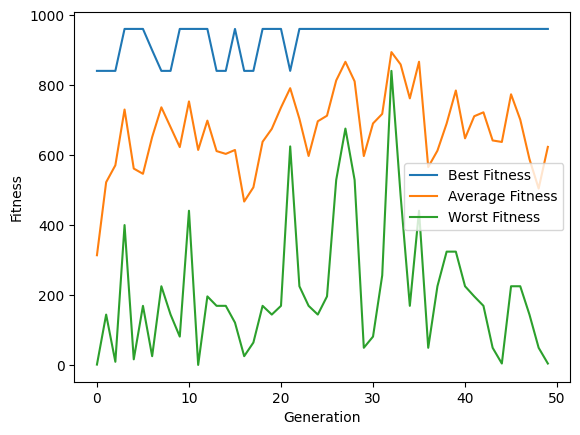

Best solution found: x = 31, f(x) = 961


In [69]:
import matplotlib.pyplot as plt

def genetic_algorithm_with_visualization(pop_size, gene_length, generations, mutation_rate):
    population = generate_population(pop_size, gene_length)
    history = []

    for gen in range(generations):
        fitnesses = [fitness_function(ind) for ind in population]
        history.append((max(fitnesses), sum(fitnesses) / len(fitnesses), min(fitnesses)))

        new_population = []
        for _ in range(pop_size // 2):
            parent1, parent2 = select_parents(population, fitnesses)
            child1, child2 = crossover(parent1, parent2, gene_length)
            new_population.extend([
                mutate(child1, gene_length, mutation_rate),
                mutate(child2, gene_length, mutation_rate)
            ])
        population = new_population

    # Visualización
    best, avg, worst = zip(*history)
    plt.plot(best, label='Best Fitness')
    plt.plot(avg, label='Average Fitness')
    plt.plot(worst, label='Worst Fitness')
    plt.xlabel('Generation')
    plt.ylabel('Fitness')
    plt.legend()
    plt.show()

    best_individual = max(population, key=fitness_function)
    return best_individual

best_solution = genetic_algorithm_with_visualization(pop_size, gene_length, generations, mutation_rate)
print(f"Best solution found: x = {best_solution}, f(x) = {fitness_function(best_solution)}")
